<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practice Using Time Series Data and Datetime

_Authors: Samuel Stack (DC)_

---

This lab covers the basics of manipulating datetime objects and using datetimes in Pandas.

### 1) Create a datetime object representing today's date.

In [1]:
from datetime import datetime
from datetime import timedelta

In [48]:
date_now = datetime.today()
date_now

datetime.datetime(2018, 7, 23, 10, 46, 27, 622000)

### 2) Write a function to print the day of the week for a datetime object.

In [34]:
print date_now.isoweekday()
print date_now.weekday()

1
0


### 3) What is the Gregorian ordinal representation of today's date? What is the difference in days between the ordinal representation of today's date and the ordinal representation of your birthday?

> *Hint: Use `.toordinal()` to get the ordinal representation. This calculates the number of days between your birthday and today's date.

In [33]:
date_now.toordinal()

736898

In [42]:
bday = datetime(1991, 5, 1).toordinal() 
date_now.toordinal() - bday

9945

### 4) Try using `timedelta()` to shift our datetime object by the following intervals.
- One hour ahead.
- Three days ago.
- One year, three days, two seconds ahead.

In [52]:
# print "microseconds:", datetime.timedelta(microseconds=1)
# print "milliseconds:", datetime.timedelta(milliseconds=1)
# print "seconds     :", datetime.timedelta(seconds=1)
# print "minutes     :", datetime.timedelta(minutes=1)
# print "hours       :", datetime.timedelta(hours=1)
# print "days        :", datetime.timedelta(days=1)
# print "weeks       :", datetime.timedelta(weeks=1)

print '1 hr ahead:', date_now + timedelta(hours=1)
print '1 hr ahead:', date_now - timedelta(days=3)

from dateutil.relativedelta import relativedelta

print '1 hr ahead:', date_now + relativedelta(years=1) + timedelta(days=3, seconds=2)

1 hr ahead: 2018-07-23 11:46:27.622000
1 hr ahead: 2018-07-20 10:46:27.622000
1 hr ahead: 2019-07-26 10:46:29.622000


### 5) Load one of the stock CSVs in the `datasets` folder.

Which you choose is up to you!

In [111]:
import pandas as pd
from datetime import timedelta
%matplotlib inline

df = pd.read_csv('datasets/vow.csv')

In [112]:
df.head()

,Date,Open,High,Low,Close,Volume
0,16-Jan-17,150.05,150.70,147.75,148.40,79341
1,13-Jan-17,151.85,154.00,149.95,151.75,112464
2,12-Jan-17,154.05,154.30,148.85,150.70,173155
3,11-Jan-17,149.05,153.65,148.80,153.15,181285
4,10-Jan-17,148.05,149.85,146.60,148.10,137786


In [116]:
pd.to_datetime(df['Date']).dt.day

0      16
1      13
2      12
3      11
4      10
5       9
6       6
7       5
8       4
9       3
10      2
11     30
12     29
13     28
14     27
15     23
16     22
17     21
18     20
19     19
20     16
21     15
22     14
23     13
24     12
25      9
26      8
27      7
28      6
29      5
       ..
225    29
226    26
227    25
228    24
229    23
230    22
231    19
232    18
233    17
234    16
235    15
236    12
237    11
238    10
239     9
240     8
241     5
242     4
243     3
244     2
245     1
246    29
247    28
248    27
249    26
250    25
251    22
252    21
253    20
254    19
Name: Date, Length: 255, dtype: int64

### 6) Take a high-level look at the data. Describe it. What are we looking at? 

Use a plotting function to provide a good visual.

In [120]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

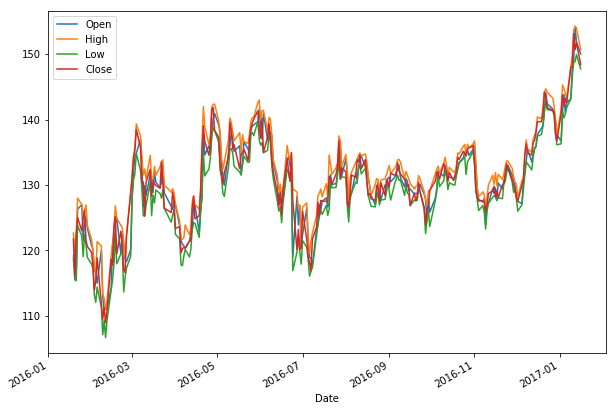

In [121]:
import matplotlib.pyplot as plt

df.drop('Volume', axis=1).plot(figsize=(10,7))

In [122]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-16,150.05,150.70,147.75,148.40,79341
2017-01-13,151.85,154.00,149.95,151.75,112464
2017-01-12,154.05,154.30,148.85,150.70,173155
2017-01-11,149.05,153.65,148.80,153.15,181285
2017-01-10,148.05,149.85,146.60,148.10,137786


### 7) Examine the Date column. Make it the index of the DataFrame.

Making the index a datetime allows us to easily order the data by time. Doing this will result in six Series objects indexed by DateTime — a literal time series!

In [123]:
# A:

In [124]:
# A:

### 8) Add columns with useful data extracted from the DateTime index.

Create at least three columns; one for day, month, and year.


In [125]:
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df.head()

,Open,High,Low,Close,Volume,day,month,year
Date,,,,,,,,
2017-01-16,150.05,150.70,147.75,148.40,79341,16,1,2017
2017-01-13,151.85,154.00,149.95,151.75,112464,13,1,2017
2017-01-12,154.05,154.30,148.85,150.70,173155,12,1,2017
2017-01-11,149.05,153.65,148.80,153.15,181285,11,1,2017
2017-01-10,148.05,149.85,146.60,148.10,137786,10,1,2017


In [128]:
df.year.unique()

array([2017, 2016], dtype=int64)

### 9) Create a subset of the data containing only 2017 dates.

In [127]:
df2 = df[df['year']==2017]
df2.head()

,Open,High,Low,Close,Volume,day,month,year
Date,,,,,,,,
2017-01-16,150.05,150.70,147.75,148.40,79341,16,1,2017
2017-01-13,151.85,154.00,149.95,151.75,112464,13,1,2017
2017-01-12,154.05,154.30,148.85,150.70,173155,12,1,2017
2017-01-11,149.05,153.65,148.80,153.15,181285,11,1,2017
2017-01-10,148.05,149.85,146.60,148.10,137786,10,1,2017


### 10) [Example] Date ranges and frequencies.

Explore the following built-in methods.
- What does `asfreq` do?
> - _Converts time series to specified frequency._

- What does `resample` do?
> - _This is a convenience method for frequency conversion and the resampling of time series. Object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex) or pass datetime-like values to the `on` or `level` keyword._

We can also create our own date ranges using a built-in function, `date_range()`. The `periods` and `freq` keyword arguments grant the user fine-grained control over the resulting values. To reset the time data, use the `normalize=True` directive.


In [132]:
pd.date_range(start='3/1/2016', periods=20)

DatetimeIndex(['2016-03-01', '2016-03-02', '2016-03-03', '2016-03-04',
               '2016-03-05', '2016-03-06', '2016-03-07', '2016-03-08',
               '2016-03-09', '2016-03-10', '2016-03-11', '2016-03-12',
               '2016-03-13', '2016-03-14', '2016-03-15', '2016-03-16',
               '2016-03-17', '2016-03-18', '2016-03-19', '2016-03-20'],
              dtype='datetime64[ns]', freq='D')

In [133]:
pd.date_range(end='6/1/2016', periods=20)

DatetimeIndex(['2016-05-13', '2016-05-14', '2016-05-15', '2016-05-16',
               '2016-05-17', '2016-05-18', '2016-05-19', '2016-05-20',
               '2016-05-21', '2016-05-22', '2016-05-23', '2016-05-24',
               '2016-05-25', '2016-05-26', '2016-05-27', '2016-05-28',
               '2016-05-29', '2016-05-30', '2016-05-31', '2016-06-01'],
              dtype='datetime64[ns]', freq='D')

In [134]:
pd.date_range('1/1/2016', '12/1/2016', freq='BM')

DatetimeIndex(['2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29',
               '2016-05-31', '2016-06-30', '2016-07-29', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [135]:
pd.date_range('3/7/2016 12:56:31', periods=6)

DatetimeIndex(['2016-03-07 12:56:31', '2016-03-08 12:56:31',
               '2016-03-09 12:56:31', '2016-03-10 12:56:31',
               '2016-03-11 12:56:31', '2016-03-12 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [136]:
pd.date_range('3/7/2012 12:56:31', periods=6, normalize=True)

DatetimeIndex(['2012-03-07', '2012-03-08', '2012-03-09', '2012-03-10',
               '2012-03-11', '2012-03-12'],
              dtype='datetime64[ns]', freq='D')

In [129]:
index = pd.date_range('3/1/2016', '6/1/2016')

# Specify a start point and how many periods should come after.
pd.date_range(start='3/1/2016', periods=20)

# Specify an end point and how many periods should come before.
pd.date_range(end='6/1/2016', periods=20)

# Frequency specifies the length of the periods — the default, "D," being daily. We understand that BM is bimonthly.
pd.date_range('1/1/2016', '12/1/2016', freq='BM')

pd.date_range('3/7/2016 12:56:31', periods=6)
# Normalize creates normal daily times and will set the default time for each day as midnight.
pd.date_range('3/7/2012 12:56:31', periods=6, normalize=True)

DatetimeIndex(['2012-03-07', '2012-03-08', '2012-03-09', '2012-03-10',
               '2012-03-11', '2012-03-12'],
              dtype='datetime64[ns]', freq='D')

We are also given a `Period` object, which can be used to represent a time interval. The `Period` object consists of a start time and an end time and can be created by providing a start time and a given frequency.

In [137]:
# Our start period was March 2016 and our period frequency is months.
march_2016 = pd.Period('2016-03', freq='M')

print march_2016.start_time
print march_2016.end_time

2016-03-01 00:00:00
2016-03-31 23:59:59.999999999


In [146]:
pd.date_range('1/1/2016', '12/1/2016', freq='bm')

DatetimeIndex(['2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29',
               '2016-05-31', '2016-06-30', '2016-07-29', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30'],
              dtype='datetime64[ns]', freq='BM')